## Import data

In [597]:
# import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [598]:
train_df = pd.read_csv("C:/Users/tanye/OneDrive/Desktop/Data Science Case Study/kaggle/Predict Podcast Listening Time/data/train.csv")
train_df

,id,Podcast_Name,Episode_Title,Episode_Length_minutes,Genre,Host_Popularity_percentage,Publication_Day,Publication_Time,Guest_Popularity_percentage,Number_of_Ads,Episode_Sentiment,Listening_Time_minutes
0,0,Mystery Matters,Episode 98,NaN,True Crime,74.81,Thursday,Night,NaN,0.0,Positive,31.41998
1,1,Joke Junction,Episode 26,119.80,Comedy,66.95,Saturday,Afternoon,75.95,2.0,Negative,88.01241
2,2,Study Sessions,Episode 16,73.90,Education,69.97,Tuesday,Evening,8.97,0.0,Negative,44.92531
3,3,Digital Digest,Episode 45,67.17,Technology,57.22,Monday,Morning,78.70,2.0,Positive,46.27824
4,4,Mind & Body,Episode 86,110.51,Health,80.07,Monday,Afternoon,58.68,3.0,Neutral,75.61031
...,...,...,...,...,...,...,...,...,...,...,...,...
749995,749995,Learning Lab,Episode 25,75.66,Education,69.36,Saturday,Morning,NaN,0.0,Negative,56.87058
749996,749996,Business Briefs,Episode 21,75.75,Business,35.21,Saturday,Night,NaN,2.0,Neutral,45.46242
749997,749997,Lifestyle Lounge,Episode 51,30.98,Lifestyle,78.58,Thursday,Morning,84.89,0.0,Negative,15.26000
749998,749998,Style Guide,Episode 47,108.98,Lifestyle,45.39,Thursday,Morning,93.27,0.0,Negative,100.72939


In [599]:
test_df = pd.read_csv("C:/Users/tanye/OneDrive/Desktop/Data Science Case Study/kaggle/Predict Podcast Listening Time/data/test.csv")
test_df

,id,Podcast_Name,Episode_Title,Episode_Length_minutes,Genre,Host_Popularity_percentage,Publication_Day,Publication_Time,Guest_Popularity_percentage,Number_of_Ads,Episode_Sentiment
0,750000,Educational Nuggets,Episode 73,78.96,Education,38.11,Saturday,Evening,53.33,1.0,Neutral
1,750001,Sound Waves,Episode 23,27.87,Music,71.29,Sunday,Morning,NaN,0.0,Neutral
2,750002,Joke Junction,Episode 11,69.10,Comedy,67.89,Friday,Evening,97.51,0.0,Positive
3,750003,Comedy Corner,Episode 73,115.39,Comedy,23.40,Sunday,Morning,51.75,2.0,Positive
4,750004,Life Lessons,Episode 50,72.32,Lifestyle,58.10,Wednesday,Morning,11.30,2.0,Neutral
...,...,...,...,...,...,...,...,...,...,...,...
249995,999995,Mind & Body,Episode 100,21.05,Health,65.77,Saturday,Evening,96.40,3.0,Negative
249996,999996,Joke Junction,Episode 85,85.50,Comedy,41.47,Saturday,Night,30.52,2.0,Negative
249997,999997,Joke Junction,Episode 63,12.11,Comedy,25.92,Thursday,Evening,73.69,1.0,Neutral
249998,999998,Market Masters,Episode 46,113.46,Business,43.47,Friday,Night,93.59,3.0,Positive


In [600]:
# check missing value
print(f"Missing value in training data:")
train_df.isnull().sum()

Missing value in training data:


id                                  0
Podcast_Name                        0
Episode_Title                       0
Episode_Length_minutes          87093
Genre                               0
Host_Popularity_percentage          0
Publication_Day                     0
Publication_Time                    0
Guest_Popularity_percentage    146030
Number_of_Ads                       1
Episode_Sentiment                   0
Listening_Time_minutes              0
dtype: int64

In [601]:
print(f"Missing value in testing data:")
test_df.isnull().sum()

Missing value in testing data:


id                                 0
Podcast_Name                       0
Episode_Title                      0
Episode_Length_minutes         28736
Genre                              0
Host_Popularity_percentage         0
Publication_Day                    0
Publication_Time                   0
Guest_Popularity_percentage    48832
Number_of_Ads                      0
Episode_Sentiment                  0
dtype: int64

In [602]:
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,750000.0,374999.500000,216506.495284,0.0,187499.75000,374999.50000,562499.25000,749999.00
Episode_Length_minutes,662907.0,64.504738,32.969603,0.0,35.73000,63.84000,94.07000,325.24
Host_Popularity_percentage,750000.0,59.859901,22.873098,1.3,39.41000,60.05000,79.53000,119.46
Guest_Popularity_percentage,603970.0,52.236449,28.451241,0.0,28.38000,53.58000,76.60000,119.91
Number_of_Ads,749999.0,1.348855,1.151130,0.0,0.00000,1.00000,2.00000,103.91
Listening_Time_minutes,750000.0,45.437406,27.138306,0.0,23.17835,43.37946,64.81158,119.97


There might be outlier in "Number_of_Ads" in training data.

In [603]:
test_df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,250000.0,874999.500000,72168.927986,750000.00,812499.75,874999.50,937499.25,999999.00
Episode_Length_minutes,221264.0,419.298741,166854.502468,2.47,35.78,63.97,94.15,78486264.00
Host_Popularity_percentage,250000.0,59.716491,22.880028,2.49,39.25,59.90,79.39,117.76
Guest_Popularity_percentage,201168.0,52.192796,28.445034,0.00,28.32,53.36,76.56,116.82
Number_of_Ads,250000.0,1.355852,4.274399,0.00,0.00,1.00,2.00,2063.00


There might be outlier "Episode_Length_minutes" and "Number_of_ads" in testing data.

In [604]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750000 entries, 0 to 749999
Data columns (total 12 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           750000 non-null  int64  
 1   Podcast_Name                 750000 non-null  object 
 2   Episode_Title                750000 non-null  object 
 3   Episode_Length_minutes       662907 non-null  float64
 4   Genre                        750000 non-null  object 
 5   Host_Popularity_percentage   750000 non-null  float64
 6   Publication_Day              750000 non-null  object 
 7   Publication_Time             750000 non-null  object 
 8   Guest_Popularity_percentage  603970 non-null  float64
 9   Number_of_Ads                749999 non-null  float64
 10  Episode_Sentiment            750000 non-null  object 
 11  Listening_Time_minutes       750000 non-null  float64
dtypes: float64(5), int64(1), object(6)
memory usage: 68.7+ MB


In [605]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 11 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           250000 non-null  int64  
 1   Podcast_Name                 250000 non-null  object 
 2   Episode_Title                250000 non-null  object 
 3   Episode_Length_minutes       221264 non-null  float64
 4   Genre                        250000 non-null  object 
 5   Host_Popularity_percentage   250000 non-null  float64
 6   Publication_Day              250000 non-null  object 
 7   Publication_Time             250000 non-null  object 
 8   Guest_Popularity_percentage  201168 non-null  float64
 9   Number_of_Ads                250000 non-null  float64
 10  Episode_Sentiment            250000 non-null  object 
dtypes: float64(4), int64(1), object(6)
memory usage: 21.0+ MB


In [606]:
# separate numerical and categorical features
n_df = ["Episode_Length_minutes", "Host_Popularity_percentage", "Guest_Popularity_percentage", "Number_of_Ads"]
c_df = ["Podcast_Name", "Episode_Title", "Genre", "Publication_Day", "Publication_Time", "Episode_Sentiment"]

## Categorical Features

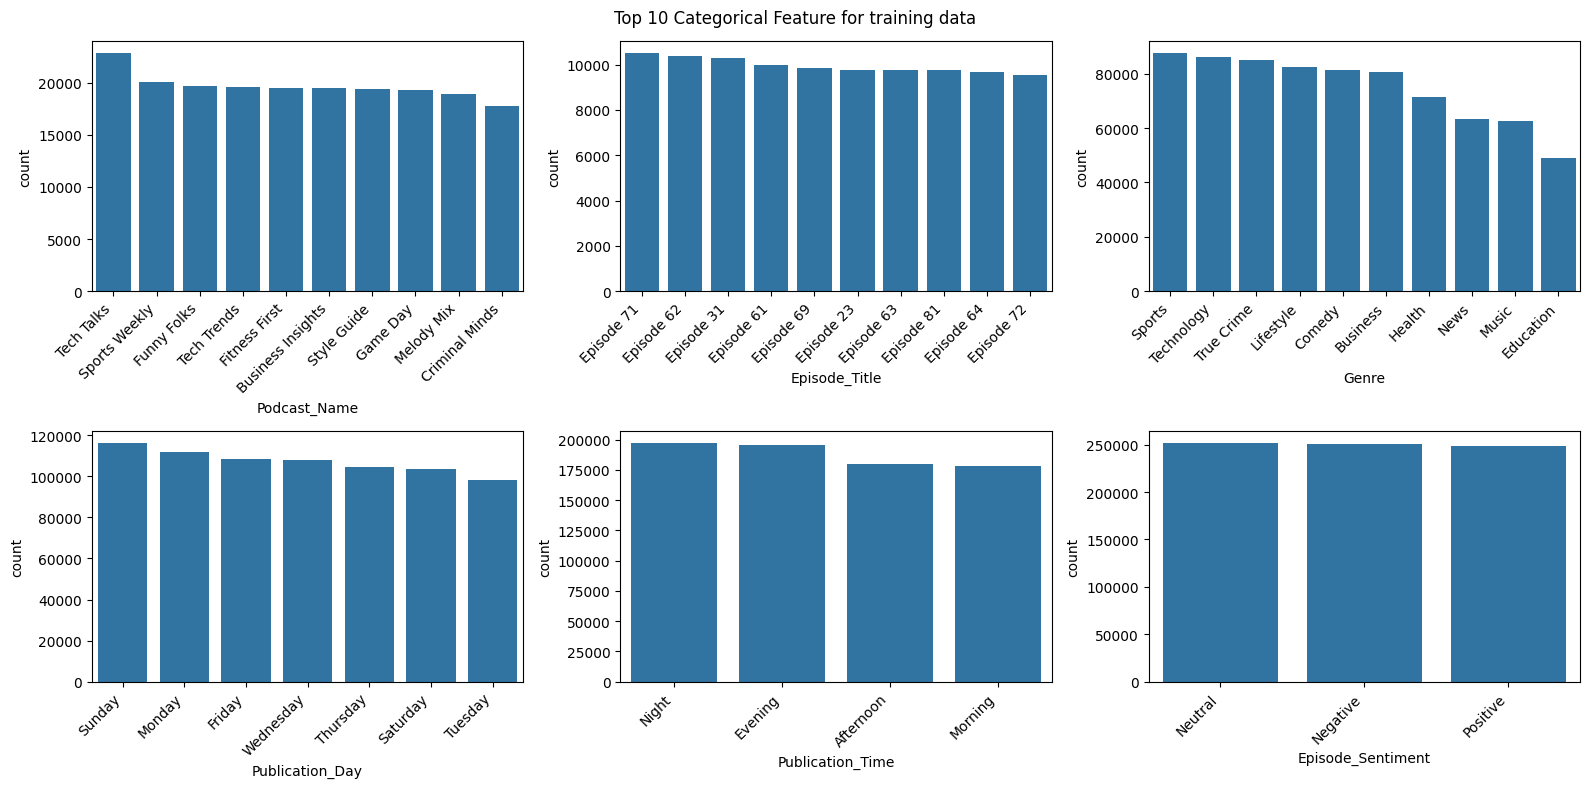

In [367]:
plt.figure(figsize=(16,8))

for i, col in zip(range(1,len(c_df)+1),c_df):
    # select only top 10 values
    top10= train_df[col].value_counts().nlargest(10)
    # sort by ascending order
    sorted_top10= top10.sort_values(ascending=False).index
    # filter 
    top10data = train_df[train_df[col].isin(sorted_top10)]

    plt.subplot(2,3,i)
    sns.countplot(data=top10data, x=col, order=sorted_top10)
    plt.xticks(rotation=45, ha="right")

plt.suptitle("Top 10 Categorical Feature for training data")
plt.tight_layout()
plt.show()

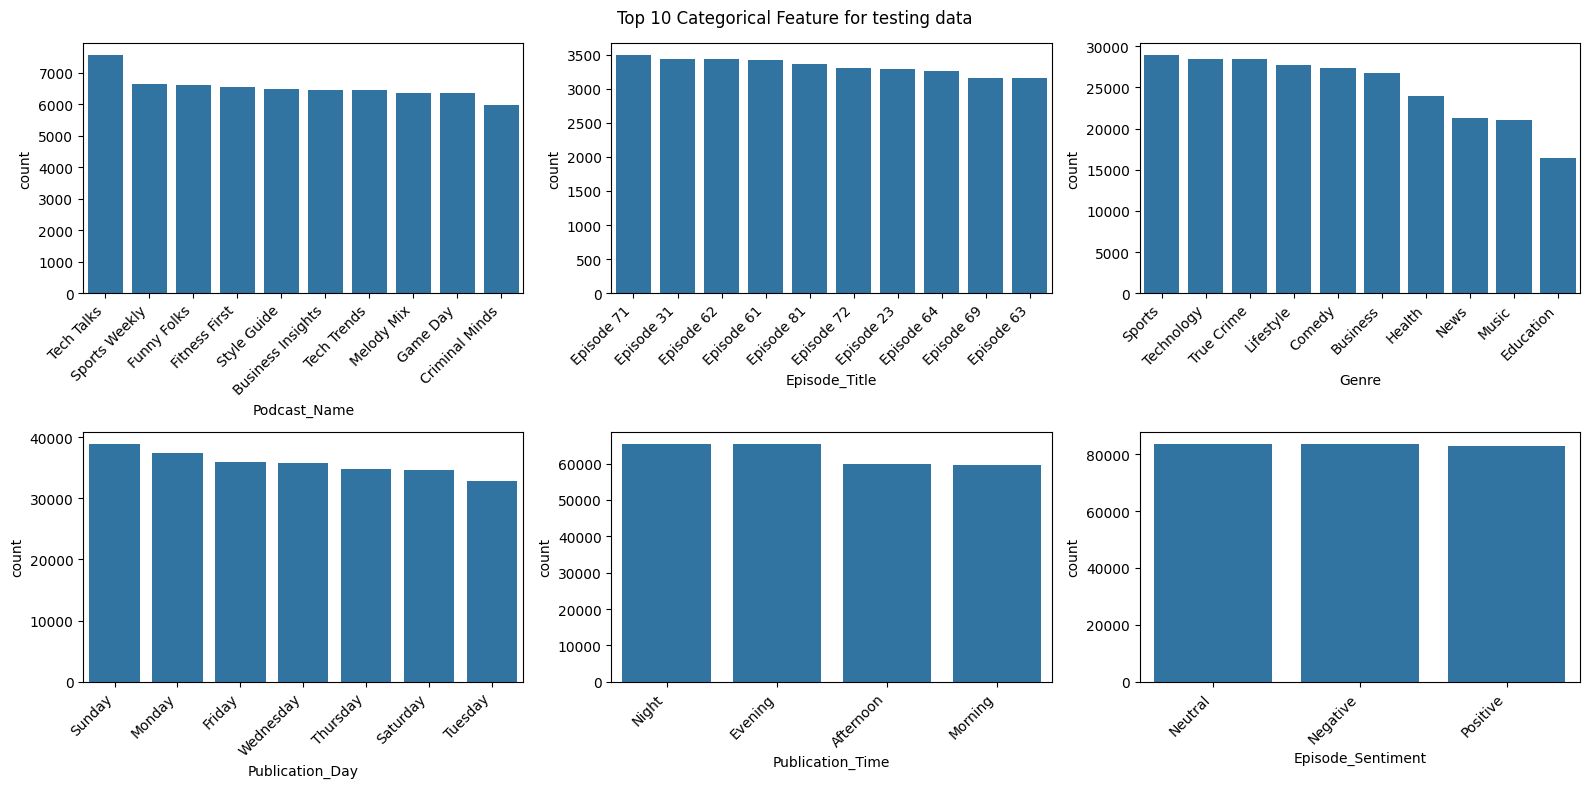

In [368]:
plt.figure(figsize=(16,8))

for i, col in zip(range(1,len(c_df)+1),c_df):
    # select only top 10 values
    top10= test_df[col].value_counts().nlargest(10)
    # sort by ascending order
    sorted_top10= top10.sort_values(ascending=False).index
    # filter 
    top10data = test_df[test_df[col].isin(sorted_top10)]

    plt.subplot(2,3,i)
    sns.countplot(data=top10data, x=col, order=sorted_top10)
    plt.xticks(rotation=45, ha="right")

plt.suptitle("Top 10 Categorical Feature for testing data")
plt.tight_layout()
plt.show()

## Numerical features

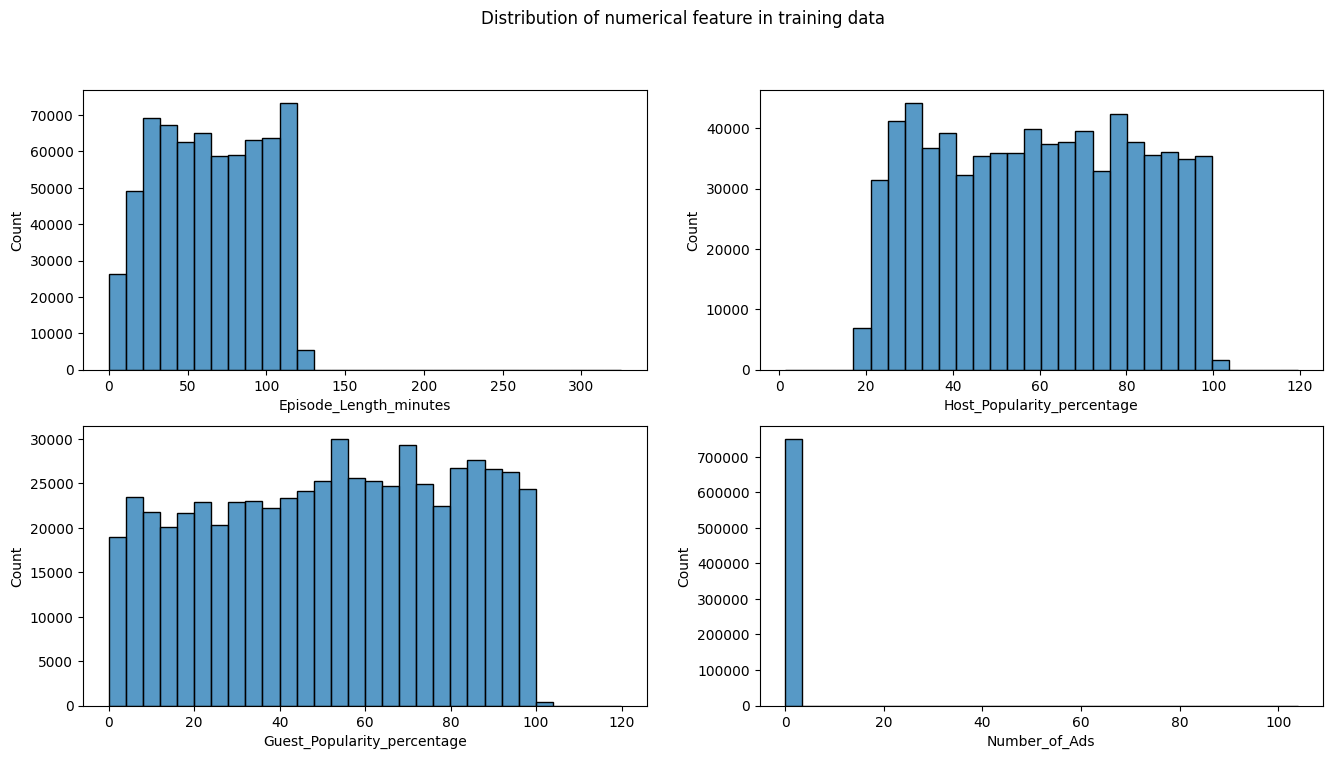

In [508]:
plt.figure(figsize=(16,8))
for i, col in zip(range(1,len(n_df)+1),n_df):
    plt.subplot(2,2,i)
    sns.histplot(data=train_df,x=col, bins=30)
plt.suptitle("Distribution of numerical feature in training data")
plt.show()

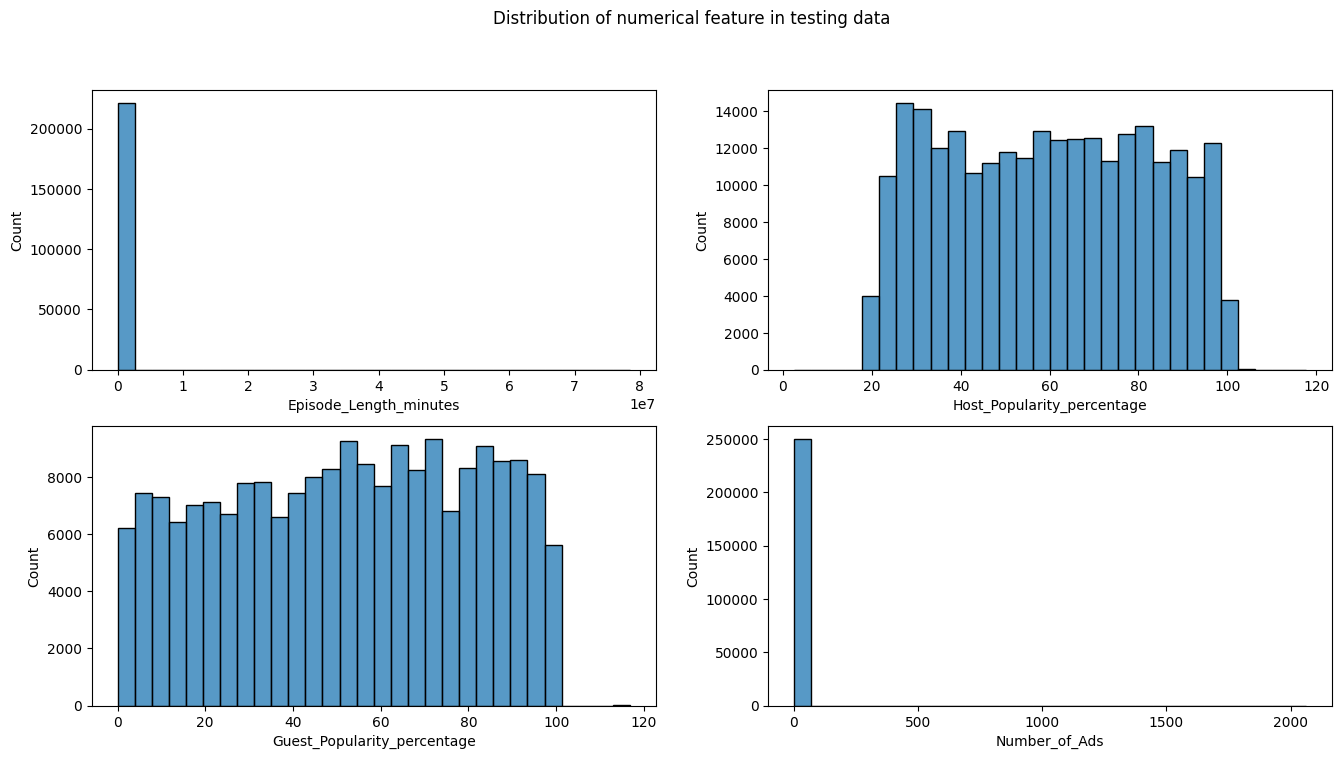

In [509]:
plt.figure(figsize=(16,8))
for i, col in zip(range(1,len(n_df)+1),n_df):
    plt.subplot(2,2,i)
    sns.histplot(data=test_df,x=col, bins=30)
plt.suptitle("Distribution of numerical feature in testing data")
plt.show()

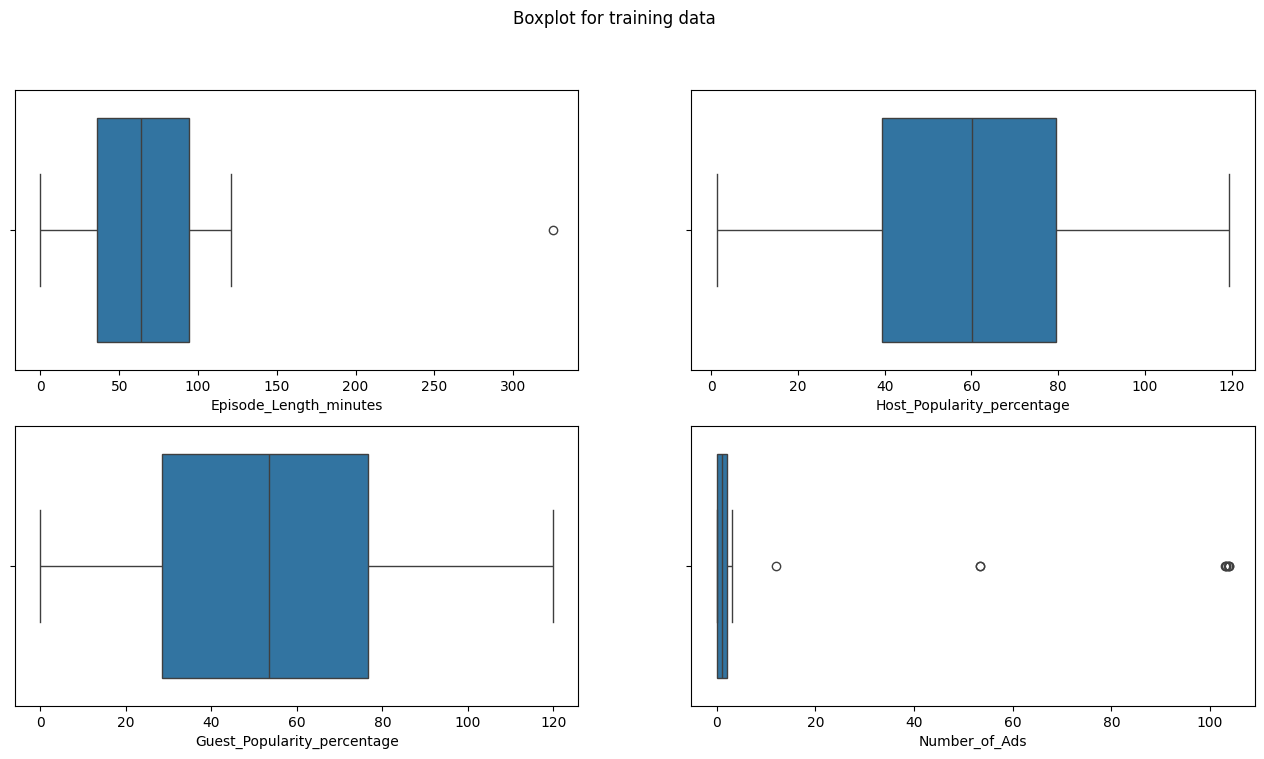

In [510]:
plt.figure(figsize=(16,8))
for i, col in zip(range(1,len(n_df)+1),n_df):
    plt.subplot(2,2,i)
    sns.boxplot(data=train_df,x=col)
plt.suptitle("Boxplot for training data")
plt.show()

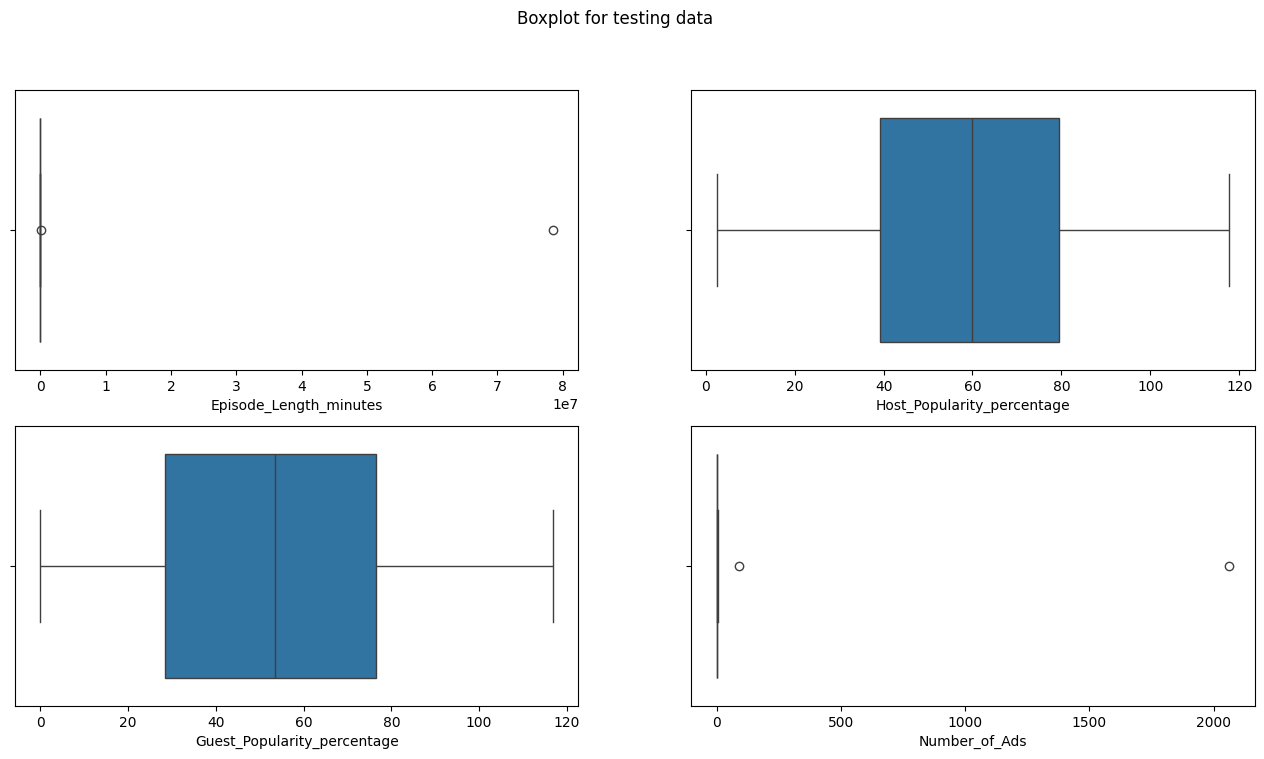

In [511]:
plt.figure(figsize=(16,8))
for i, col in zip(range(1,len(n_df)+1),n_df):
    plt.subplot(2,2,i)
    sns.boxplot(data=test_df,x=col)
plt.suptitle("Boxplot for testing data")
plt.show()

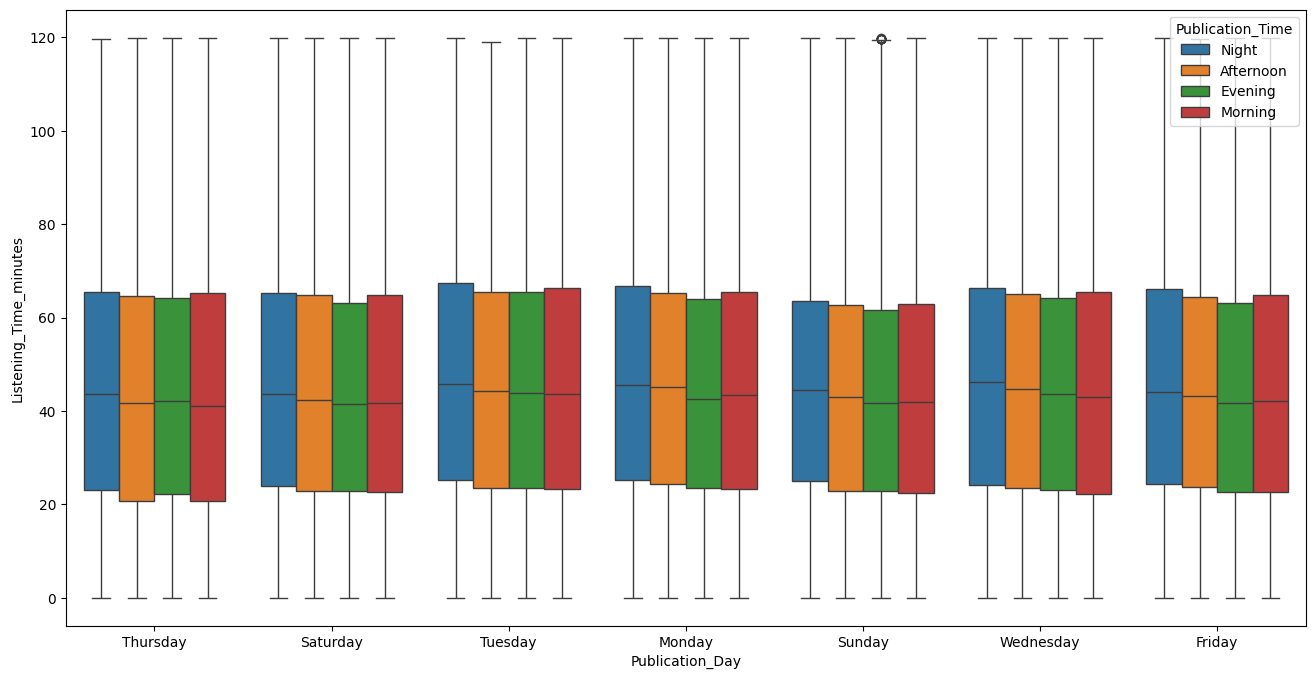

In [512]:
plt.figure(figsize=(16,8))
sns.boxplot(data=train_df,x="Publication_Day", y="Listening_Time_minutes", hue="Publication_Time")
plt.show()

- This boxplots shows the relationship between publication day and publication time to listening time in minutes.
- Median of listening time is similar across publication day.
- There is a little fluctuation between day and night publication time in a day.

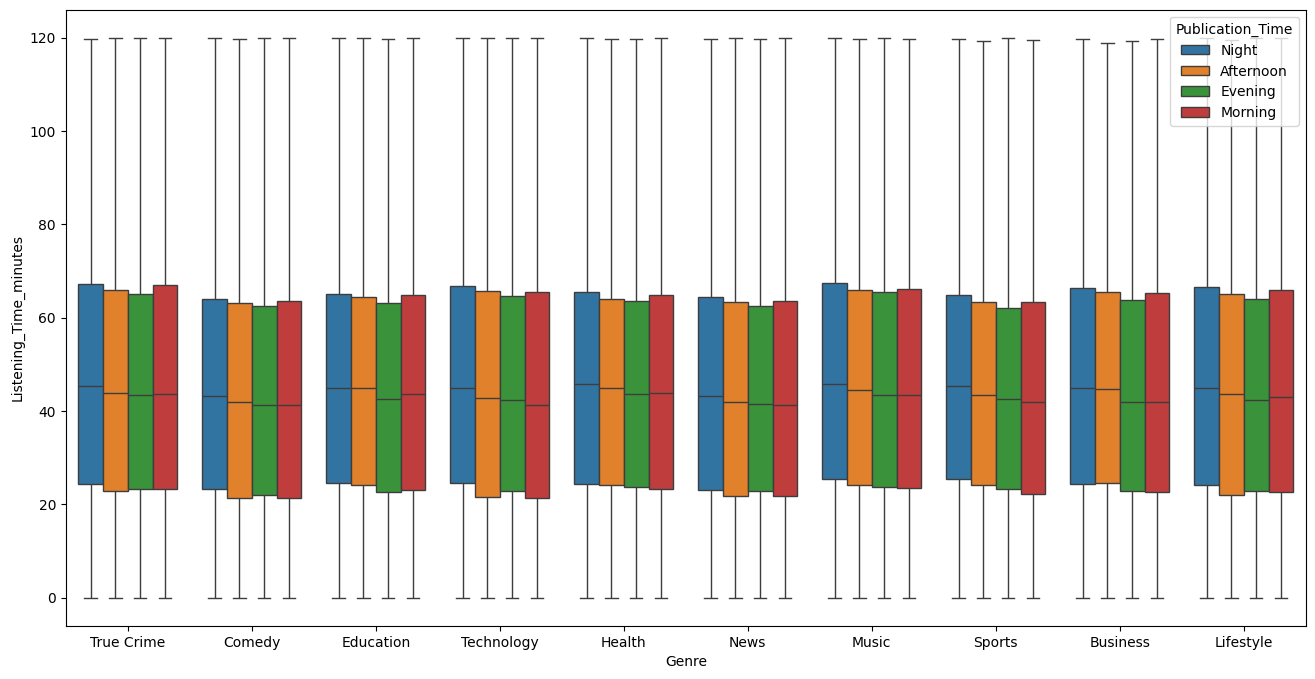

In [513]:
plt.figure(figsize=(16,8))
sns.boxplot(data=train_df,x="Genre", y="Listening_Time_minutes", hue="Publication_Time")
plt.show()

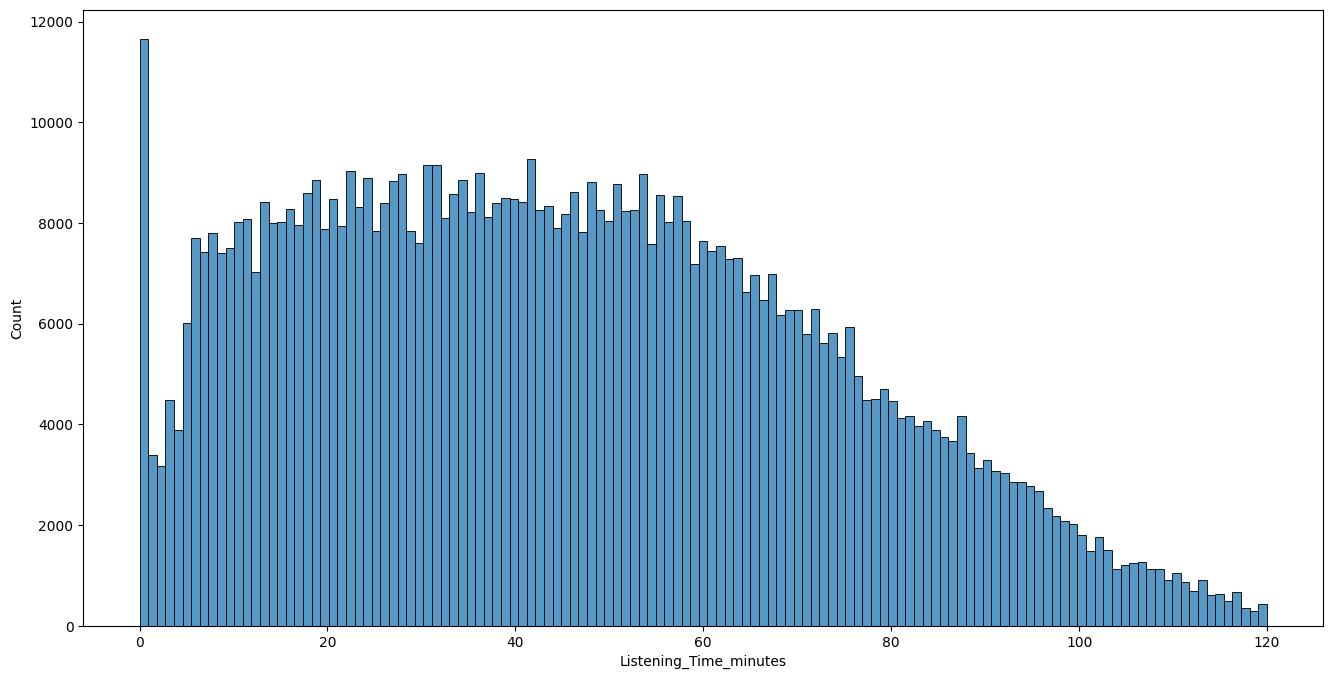

In [514]:
plt.figure(figsize=(16,8))
sns.histplot(data=train_df, x="Listening_Time_minutes")
plt.show()

## Feature Engineering

In [607]:
# Some episode length time are zeros
train_df["Episode_Length_minutes"]=train_df["Episode_Length_minutes"].replace(0,np.nan)

train_df["Listening_Rate"]=train_df["Listening_Time_minutes"]/train_df["Episode_Length_minutes"]
train_df["Listening_Rate"].isnull().sum()

np.int64(87094)

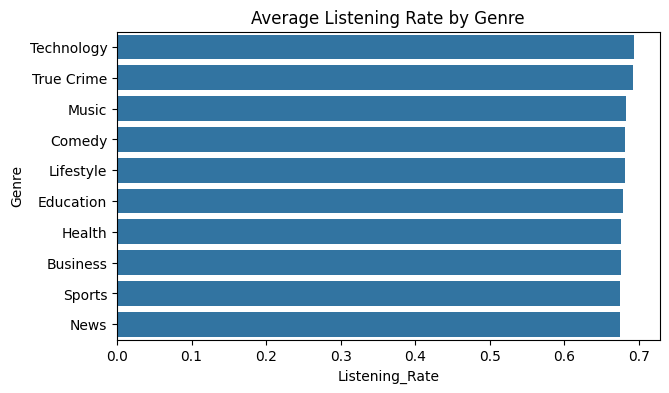

In [608]:
genre_listening_rate = train_df.groupby("Genre")["Listening_Rate"].mean().sort_values(ascending=False)

plt.figure(figsize=(7,4))
sns.barplot(x=genre_listening_rate, y=genre_listening_rate.index)
plt.title("Average Listening Rate by Genre")
plt.show()

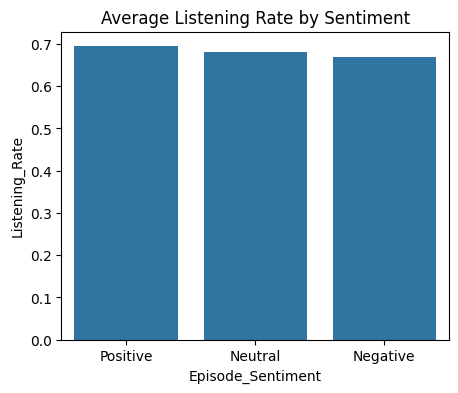

In [609]:
# Sentiment analysis by listening rate
sentiment_listening_rate = train_df.groupby("Episode_Sentiment")["Listening_Rate"].mean().sort_values(ascending=False)

plt.figure(figsize=(5,4))
sns.barplot(x=sentiment_listening_rate.index, y=sentiment_listening_rate)
plt.title("Average Listening Rate by Sentiment")
plt.show()

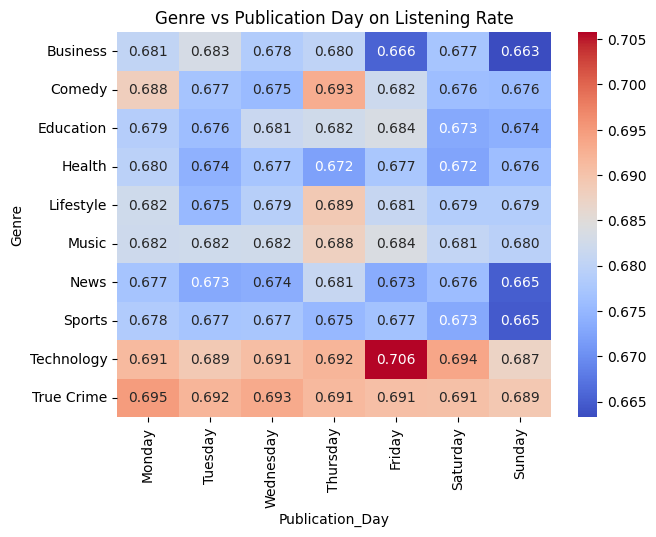

In [610]:
# Analyse Genre vs Publication day on listening rate
genre_day_listening_rate = pd.pivot_table(data=train_df, values="Listening_Rate", index="Genre", columns="Publication_Day", aggfunc="mean")

day_order = ["Monday","Tuesday","Wednesday","Thursday","Friday", "Saturday","Sunday"]
genre_day_listening_rate=genre_day_listening_rate[day_order]

plt.figure(figsize=(7,5))
sns.heatmap(genre_day_listening_rate,annot=True,fmt=".3f",cmap="coolwarm")
plt.title("Genre vs Publication Day on Listening Rate")
plt.show()

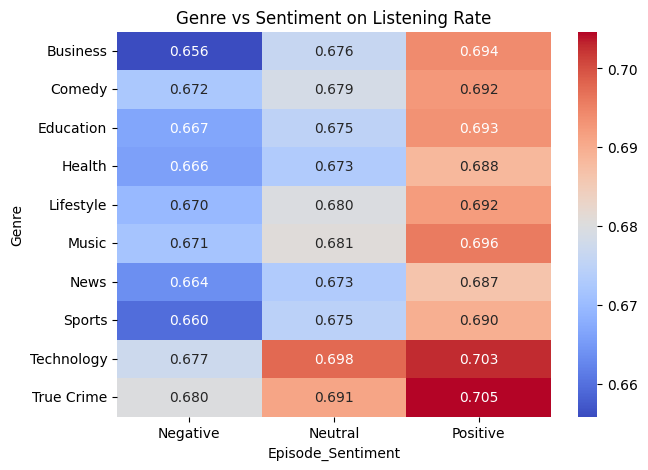

In [611]:
# Study genre vs sentiment on listening rate
genre_sentiment_listening_rate = pd.pivot_table(data=train_df,values="Listening_Rate", index="Genre", columns="Episode_Sentiment", aggfunc="mean")
plt.figure(figsize=(7,5))
sns.heatmap(genre_sentiment_listening_rate,annot=True,fmt=".3f",cmap="coolwarm")
plt.title("Genre vs Sentiment on Listening Rate")
plt.show()

## Correlation Analysis

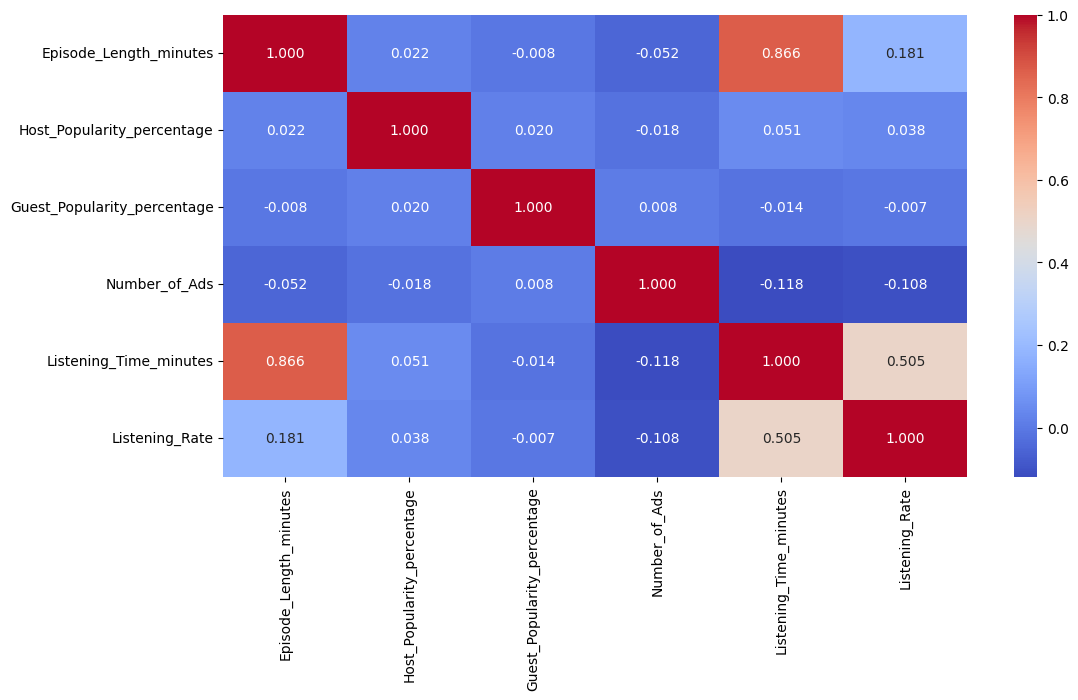

In [497]:
corr = train_df[n_df+["Listening_Time_minutes","Listening_Rate"]].corr()
plt.figure(figsize=(12,6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".3f")
plt.show()

## Mising value

In [498]:
# Missing value percentage
print(f"Percentage for training data:/n {train_df.isnull().sum()/len(train_df)*100}")
print(f"/nPercentage for testing data:/n {test_df.isnull().sum()/len(test_df)*100}")

Percentage for training data:/n id                             0.000000
Podcast_Name                   0.000000
Episode_Title                  0.000000
Episode_Length_minutes         0.000133
Genre                          0.000000
Host_Popularity_percentage     0.000000
Publication_Day                0.000000
Publication_Time               0.000000
Guest_Popularity_percentage    0.000000
Number_of_Ads                  0.000000
Episode_Sentiment              0.000000
Listening_Time_minutes         0.000000
Listening_Rate                 0.000133
dtype: float64
/nPercentage for testing data:/n id                             0.0
Podcast_Name                   0.0
Episode_Title                  0.0
Episode_Length_minutes         0.0
Genre                          0.0
Host_Popularity_percentage     0.0
Publication_Day                0.0
Publication_Time               0.0
Guest_Popularity_percentage    0.0
Number_of_Ads                  0.0
Episode_Sentiment              0.0
dtype: float64


## Outliers Detection

We will direct remove the outliers if the value does not make sense.

In [499]:
#"Episode_Length_minutes", "Number_of_Ads"
# Training data
def detect_outlier(df, columns):
    outlier_dict={}
    for col in columns:
        Q1=df[col].quantile(0.25)
        Q3=df[col].quantile(0.75)
        IQR=Q3-Q1
        Lower_limit=Q1-1.5*IQR
        Upper_limit=Q3+1.5*IQR

        outlier=df.loc[(df[col]>Upper_limit)|(df[col]<Lower_limit), col]
        outlier_dict[col]=outlier
    
    return outlier_dict
        
outlier_col =["Episode_Length_minutes", "Number_of_Ads"]


In [500]:
# apply function
train_outlier=detect_outlier(train_df, outlier_col)
test_outlier=detect_outlier(test_df, outlier_col)

print(f"Training data:")
for col, outlier in train_outlier.items():
    print(f"{col}\n:{outlier}\n")

print(f"\nTesting data:")
for col, outlier in test_outlier.items():
    print(f"{col}\n:{outlier}\n")

Training data:
Episode_Length_minutes
:101637    325.24
Name: Episode_Length_minutes, dtype: float64

Number_of_Ads
:211159     53.37
283606    103.91
436577    103.00
495919     53.42
537705    103.75
567235     12.00
602553    103.25
672139    103.25
683147    103.88
Name: Number_of_Ads, dtype: float64


Testing data:
Episode_Length_minutes
:101637    325.24
Name: Episode_Length_minutes, dtype: float64

Number_of_Ads
:211159    53.37
Name: Number_of_Ads, dtype: float64



## Prepare data for modelling

We will use models
- XGBoost
- LightGBM Regressor

Evaluate by
- RMSE

In [591]:
# import packages
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder, FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import KFold
# package for model
from xgboost import XGBRegressor
# package for evaluation
from sklearn.metrics import mean_squared_error

In [ ]:
# Define columns to drop (consistent between train/test)
cols_to_drop = ["Podcast_Name", "Episode_Title", "id", "Listening_Rate"]
dropped_train_df = train_df.drop(columns=cols_to_drop)

# Split into features/target
X = dropped_train_df.drop(columns="Listening_Time_minutes")
y = dropped_train_df["Listening_Time_minutes"]

# Split features categories for preprocessing pipelines
categorical_features = ["Genre", "Publication_Day", "Publication_Time"]
ordinal_features = ["Episode_Sentiment"]

for col in categorical_features+ordinal_features:
    X[col] = X[col].astype('category')

numeric_features = [col for col in X.columns 
                   if col not in ["Listening_Time_minutes"] + ordinal_features + categorical_features]

In [613]:
# Create Preprocessing Pipelines
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('log_transform', FunctionTransformer(np.log1p)),  # For skewed features
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

ordinal_transformer = Pipeline(steps=[
    ('encoder', OrdinalEncoder(
        categories=[['Negative', 'Neutral', 'Positive']],
        handle_unknown='use_encoded_value',
        unknown_value=-1
    ))
])

# Combine in ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features),
        ('sent', ordinal_transformer, ordinal_features)
    ],
    remainder='drop'
)


## Model Training

In [634]:
# XGBoost Parameters
xgb_params = {
    'n_estimators': 565,
    'max_depth': 14,
    'learning_rate': 0.04222221,
    'subsample': 0.8,
    'colsample_bytree': 0.8
}

In [641]:
# K-Fold Cross-Validation
# Initialize
kf = KFold(n_splits=10, shuffle=True, random_state=42)
errors = []
feature_importances = []
oof_predictions = np.zeros(len(X))  # Out-of-fold predictions

for fold, (train_idx, val_idx) in enumerate(kf.split(X,y)):
    print(f"\nFold {fold + 1}")
    
    # Split data
    X_train, X_val = X.iloc[train_idx].copy(), X.iloc[val_idx].copy()
    y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]
    
    X_train_processed = preprocessor.fit_transform(X_train)
    X_val_processed=preprocessor.transform(X_val)

    # Initialize model
    model = XGBRegressor(
        **xgb_params,
        early_stopping_rounds=100,
        eval_metric='rmse',
        random_state=42,
        n_jobs=-1,
    )

    # Train with early stopping
    model.fit(
        X_train_processed, y_train,
        eval_set=[(X_val_processed, y_val)],
        verbose=True
    )
    
    # Store predictions and errors
    val_preds = model.predict(X_val_processed)
    oof_predictions[val_idx] = val_preds
    fold_rmse = np.sqrt(mean_squared_error(y_val, val_preds))
    errors.append(fold_rmse)
    
    print(f"Fold {fold + 1} RMSE: {fold_rmse:.4f}")
    print(f"Best iteration: {model.best_iteration}")

# Results summary
print(f"\n=== Cross-Validation Results ===")
print(f"Mean RMSE: {np.mean(errors):.4f} ± {np.std(errors):.4f}")
print(f"95% CI: [{np.mean(errors)-1.96*np.std(errors):.4f}, {np.mean(errors)+1.96*np.std(errors):.4f}]")



Fold 1
[0]	validation_0-rmse:26.25965
[1]	validation_0-rmse:26.23195
[2]	validation_0-rmse:25.41074
[3]	validation_0-rmse:25.37065
[4]	validation_0-rmse:24.59614
[5]	validation_0-rmse:23.86159
[6]	validation_0-rmse:23.17307
[7]	validation_0-rmse:22.51804
[8]	validation_0-rmse:21.89822
[9]	validation_0-rmse:21.86798
[10]	validation_0-rmse:21.28473
[11]	validation_0-rmse:21.27046
[12]	validation_0-rmse:20.72694
[13]	validation_0-rmse:20.21079
[14]	validation_0-rmse:19.72389
[15]	validation_0-rmse:19.70234
[16]	validation_0-rmse:19.24755
[17]	validation_0-rmse:18.81847
[18]	validation_0-rmse:18.41722
[19]	validation_0-rmse:18.03990
[20]	validation_0-rmse:18.03051
[21]	validation_0-rmse:17.67822
[22]	validation_0-rmse:17.34697
[23]	validation_0-rmse:17.03836
[24]	validation_0-rmse:16.75253
[25]	validation_0-rmse:16.48062
[26]	validation_0-rmse:16.22803
[27]	validation_0-rmse:15.99183
[28]	validation_0-rmse:15.77236
[29]	validation_0-rmse:15.56581
[30]	validation_0-rmse:15.55611
[31]	valid

In [655]:
X_test = test_df.drop(["Podcast_Name", "Episode_Title", "id"],axis=1)

preprocessor.fit(X)
X_train = preprocessor.transform(X)
X_test = preprocessor.transform(X_test)

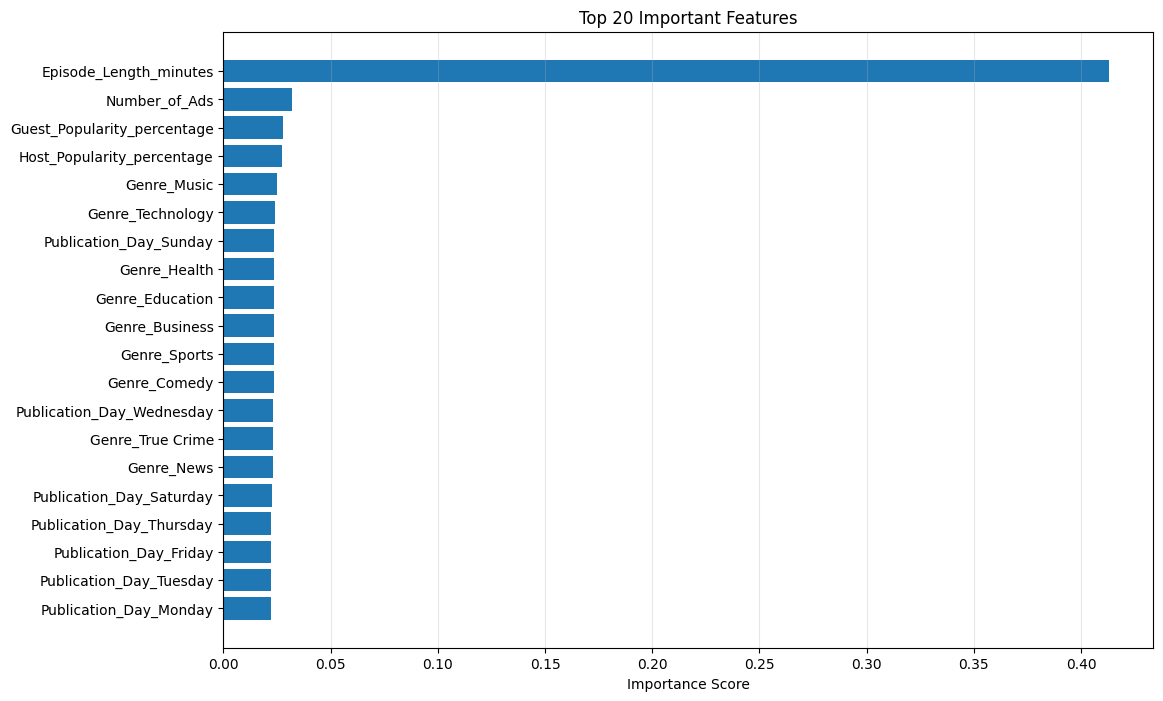

In [ ]:
import matplotlib.pyplot as plt
from xgboost import plot_importance

# Manually handle feature names (fallback method) from processor
def get_feature_names_from_column_transformer(ct):
    feature_names = []
    for name, trans, cols in ct.transformers_:
        if trans == 'drop' or trans is None:
            continue
        try:
            if hasattr(trans, 'get_feature_names_out'):
                names = trans.get_feature_names_out(cols)
            else:
                names = cols  # fallback: just use original column names
        except:
            names = cols
        feature_names.extend(names)
    return feature_names

feature_names = get_feature_names_from_column_transformer(preprocessor)


# Create importance DataFrame
importance_df = pd.DataFrame({
    'feature': feature_names,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)

# Plot
plt.figure(figsize=(12, 8))
plt.barh(importance_df['feature'][:20], importance_df['importance'][:20])
plt.xlabel('Importance Score')
plt.title('Top 20 Important Features')
plt.gca().invert_yaxis()  # Most important at top
plt.grid(axis='x', alpha=0.3)
plt.show()

# Final Submission

In [678]:
pred = model.predict(X_test)

df_sub = pd.read_csv("C:/Users/tanye/OneDrive/Desktop/Data Science Case Study/kaggle/Predict Podcast Listening Time/data/sample_submission.csv")
df_sub['Listening_Time_minutes'] = pred
df_sub.to_csv('submission.csv', index=False)
df_sub.head()

,id,Listening_Time_minutes
0,750000,55.802032
1,750001,19.646049
2,750002,55.826950
3,750003,73.425797
4,750004,47.341736


<Axes: ylabel='Count'>

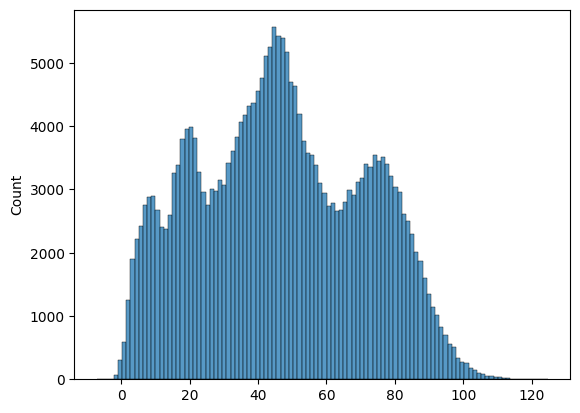

In [679]:
sns.histplot(pred)